### 14-1

In [50]:
import pandas as pd
df = pd.read_csv('../datafiles/Boston.csv') # csvの読み込み
df.head(2) # 先頭2行の表示

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [51]:
df.shape

(100, 14)

### 14-2

In [52]:
df2 = df.fillna(df.mean(numeric_only=True)) # 列ごとの平均値で欠損値の穴埋め

### 14-3

In [53]:
dummy = pd.get_dummies(df2['CRIME'], drop_first = True)
df3 = df2.join(dummy) # df2とdummyを列方向に結合
df3 = df3.drop(['CRIME'], axis = 1) # 元のCRIMEを削除

df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,False,False
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,True,False


### 14-4

In [54]:
from sklearn.preprocessing import StandardScaler
 # 中身が整数だと、fit_transformで警告になるので、
# float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

### 14-5

In [55]:
from sklearn.decomposition import PCA

### 14-6

In [56]:
model = PCA(n_components = 2, whiten = True) # モデル作成

### 14-7

In [57]:
# モデルに学習させる
model.fit(sc_df)

PCA(n_components=2, whiten=True)

### 14-8

In [58]:
print(model)
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0] )
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

PCA(n_components=2, whiten=True)
[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
-----
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [59]:
pd.DataFrame(sc_df).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.413801,-0.020551,-0.459063,0.172917,-0.484837,0.593037,-0.254450,-0.257640,-0.262523,0.145139,-0.337898,0.193146,-0.202371,0.409133
1,-0.413801,1.000000,0.157138,0.802464,-0.421951,0.620097,-0.676479,0.650419,0.743518,0.282389,-0.324724,0.562670,-0.396040,0.063395,-0.693969
2,-0.020551,0.157138,1.000000,0.129360,0.072048,0.096141,-0.118997,0.095892,0.103137,-0.030505,0.017520,-0.061717,0.114753,0.079472,-0.137649
3,-0.459063,0.802464,0.129360,1.000000,-0.297557,0.682188,-0.755101,0.622817,0.690715,0.099131,-0.371033,0.506199,-0.286387,0.063427,-0.701661
4,0.172917,-0.421951,0.072048,-0.297557,1.000000,-0.201136,0.095502,-0.277106,-0.354765,-0.363856,0.099481,-0.560947,0.686674,0.134248,0.188623
5,-0.484837,0.620097,0.096141,0.682188,-0.201136,1.000000,-0.696931,0.401993,0.441867,0.147185,-0.231157,0.471668,-0.261573,0.226705,-0.602254
6,0.593037,-0.676479,-0.118997,-0.755101,0.095502,-0.696931,1.000000,-0.470486,-0.499881,-0.083598,0.237879,-0.380318,0.036360,-0.160125,0.610582
7,-0.254450,0.650419,0.095892,0.622817,-0.277106,0.401993,-0.470486,1.000000,0.944359,0.441135,-0.377976,0.317398,-0.245235,-0.243074,-0.574758
8,-0.257640,0.743518,0.103137,0.690715,-0.354765,0.441867,-0.499881,0.944359,1.000000,0.409159,-0.383749,0.367904,-0.333706,-0.227436,-0.593016
9,-0.262523,0.282389,-0.030505,0.099131,-0.363856,0.147185,-0.083598,0.441135,0.409159,1.000000,-0.156204,0.262200,-0.453794,-0.129344,-0.152630


### 14-9

In [60]:
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head(3)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175


In [61]:
print(new_df.corr())
new_df.cov()


              0             1
0  1.000000e+00  2.624164e-16
1  2.624164e-16  1.000000e+00


,0,1
0,1.000000e+00,2.911629e-16
1,2.911629e-16,1.000000e+00


### 14-10

In [62]:
new_df.columns = ['PC1', 'PC2']
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([df5, new_df], axis=1)
df6

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low,PC1,PC2
0,-0.467750,1.249826,-0.229416,1.576995,-3.499220,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0,1.490417,-0.680415
1,-0.467750,-0.337700,-0.229416,-0.048340,-0.374040,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0,0.703223,-0.252517
2,3.432136,-1.311574,-0.229416,-1.158986,-0.096712,-0.975080,1.121690,-0.816890,-0.206570,-1.974883,0.356734,-0.646853,0.067526,-0.577350,1.0,-1.403756,-0.613175
3,-0.467750,1.853915,-0.229416,0.728209,-0.111102,1.159555,-1.101934,-0.574758,0.348525,1.388161,0.409624,0.976017,-0.594083,1.732051,-1.0,1.030971,0.560933
4,-0.467750,1.249826,-0.229416,0.637912,0.973358,0.072506,-0.684301,1.846563,1.776804,0.870770,0.034157,-0.024483,0.666125,-0.577350,-1.0,0.898674,0.272037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.467750,1.249826,-0.229416,1.775647,-0.022147,1.234896,-0.939511,1.846563,1.776804,0.870770,0.389178,0.700880,-0.531073,-0.577350,-1.0,1.456294,-0.118414
96,-0.467750,1.249826,-0.229416,1.008127,-0.623898,-0.623493,-0.426433,1.846563,1.776804,0.870770,-0.646482,0.338934,-0.373547,-0.577350,-1.0,1.135216,-0.656420
97,-0.467750,1.249826,-0.229416,1.152602,0.188466,1.098566,-1.238504,1.846563,1.776804,0.870770,0.409624,1.745519,-1.087664,-0.577350,-1.0,1.530951,-0.370069
98,-0.467750,-0.057173,-0.229416,0.005837,-0.421134,0.632175,0.024013,-0.574758,-0.480999,-0.060535,0.304858,0.956890,-0.594083,1.732051,-1.0,0.282690,0.473770


### 14-11

In [63]:
df_corr = df6.corr() # 相関係数の計算
df_corr.loc[:'very_low', 'PC1':] #先頭からvery_low行まで, PC1列から最後(PC2)まで

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


### 14-12

In [64]:
# わかりやすいように変数に代入
pc_corr = df_corr.loc[:'very_low', 'PC1':]

pc_corr['PC1'].sort_values(ascending = False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

### 14-13

In [65]:
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

In [66]:
#0.55以上を抽出
pc_corr['PC2'].sort_values(ascending = False).where(pc_corr['PC2']>=0.55).dropna()

PRICE    0.654321
low      0.622828
RM       0.596553
Name: PC2, dtype: float64

### 14-14

<Axes: xlabel='City', ylabel='Exclusive residential'>

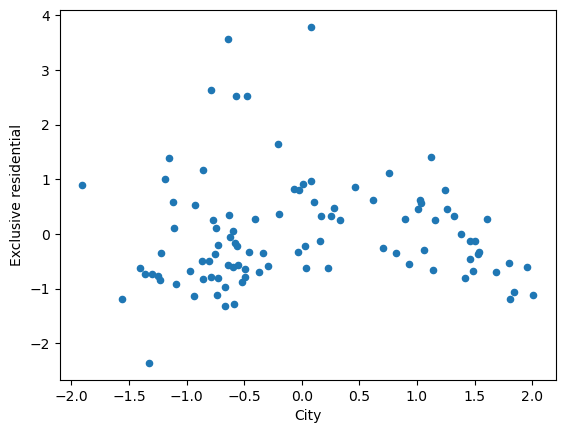

In [67]:
#都市の発展度合いと住環境の良さ
col = ['City', 'Exclusive residential']

new_df.columns = col # 列名の変更

new_df.plot(kind = 'scatter', x = 'City',
    y = 'Exclusive residential') # 散布図

In [68]:
new_df.corr()

,City,Exclusive residential
City,1.000000e+00,2.624164e-16
Exclusive residential,2.624164e-16,1.000000e+00


### 14-15

In [69]:
model = PCA(whiten = True)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

### 14-16

In [70]:
print(model.explained_variance_)
model.explained_variance_ratio_ # 寄与率


[6.22769528 2.19465125 1.54434815 0.97711428 0.94449762 0.88035322
 0.73389564 0.43715569 0.32461079 0.27756996 0.23832489 0.16191077
 0.13916144 0.04205272 0.02817345]


array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

### 14-17

<Axes: >

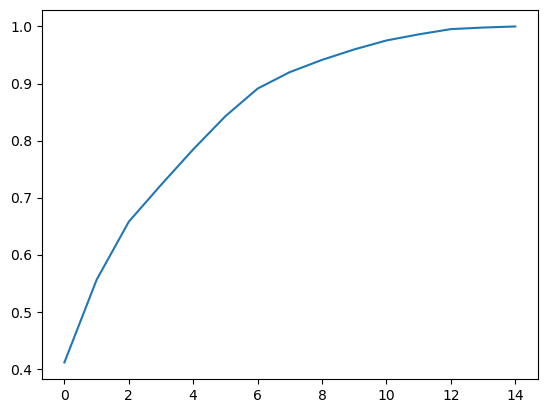

In [71]:
ratio = model.explained_variance_ratio_ # 寄与率のデータ集合

array = [] # 第N列までの累積寄与率を格納するリスト
for i in range(len(ratio)):
# 累積寄与率の計算
    ruiseki = sum(ratio[0:(i+1)])

    array.append(ruiseki) # 累積寄与率の格納

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind = 'line')

### 14-18

In [72]:
thred = 0.8 # 累積寄与率のしきい値
for i in range(len(array)):
 # 第(i + 1)列の累積寄与率がthredより大きいかチェック
    if array[i] >= thred:
        print(i + 1)
        break

6


### 14-19

In [73]:
model = PCA(n_components=6, whiten = True)

model.fit (sc_df) # 学習

# 元データを新規の列（6列）に当てはめる
new = model.transform(sc_df)

### 14-20

In [74]:
# 主成分分析の結果をデータフレームに変換
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
new_df2 = pd.DataFrame(new, columns = col)

# データフレームをcsvファイルとして保存
new_df2.to_csv('boston_pca.csv', index = False)

### 練習

In [101]:
import pandas as pd
df= pd.read_csv("../datafiles/Cinema.csv")
# df

# df.isnull().sum()
df2=df.fillna(df.mean(numeric_only=True))
df2.isnull().sum()

#ダミー処理は不要
df3=df2

from sklearn.preprocessing import StandardScaler
 # 中身が整数だと、fit_transformで警告になるので、
# float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

from sklearn.decomposition import PCA

#14-6
model = PCA(n_components = 3, whiten = True) # モデル作成

# モデルに学習させる
model.fit(sc_df)

print(model)
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0] )
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

pd.DataFrame(sc_df).corr()

new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head(3)

print(new_df.corr())
new_df.cov()

new_df.columns = ['PC1', 'PC2',"PC3"]
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([new_df,df5], axis=1)
df6

df_corr = df6.corr() # 相関係数の計算
df_corr.loc["PC1":"PC3", 'SNS1':] #先頭からvery_low行まで, PC1列から最後(PC2)まで

PCA(n_components=3, whiten=True)
[ 0.12101673 -0.44673982 -0.36331076 -0.50500501 -0.28365376 -0.56417574]
-----
[ 0.96223508 -0.02351082 -0.12616724  0.10866552  0.17740259  0.11980333]
              0             1             2
0  1.000000e+00 -3.162453e-16  5.551115e-17
1 -3.162453e-16  1.000000e+00  2.287732e-16
2  5.551115e-17  2.287732e-16  1.000000e+00


,SNS1,SNS2,actor,original,sales
PC1,-0.737626,-0.599874,-0.833829,-0.468350,-0.931528
PC2,-0.023325,-0.125172,0.107809,0.176003,0.118858
PC3,0.044873,0.517504,0.062596,-0.782241,0.012352


### 練習回答

In [80]:
df = pd.read_csv('cinema.csv')
df = df.drop('cinema_id', axis = 1)
# 欠損値補完
df = df.fillna(df.mean())
# 可能なら外れ値の確認もするが
# 今回は割愛

FileNotFoundError: [Errno 2] No such file or directory: 'cinema.csv'

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns = df.columns)

In [27]:
# 累積寄与率を調べる
from sklearn.decomposition import PCA
model = PCA(whiten = True)
model.fit(sc_df)

total = []
for i in model.explained_variance_ratio_:
    if len(total) == 0:
        total.append(i)
    else:
        tmp = total[-1] + i
        total.append(tmp)
total

[0.5401206784462206,
 0.7261760786703706,
 0.8624874337165253,
 0.9677581622696745,
 1.0]

In [28]:
model = PCA(whiten=True, n_components = 3)
model.fit(sc_df)
new = pd.DataFrame(model.transform(sc_df), columns=['pc1',
'pc2', 'pc3'])
new_df = pd.concat([new, sc_df], axis = 1)
cor_df = new_df.corr()
cor_df.loc['pc1':'pc3', 'SNS1':]

,SNS1,SNS2,actor,original,sales
pc1,0.736368,0.598555,0.837999,0.469117,0.936901
pc2,-0.050756,-0.534089,-0.037073,0.800559,0.013415
pc3,-0.531509,0.536704,-0.017275,0.324773,-0.072303
